In [1]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# sprawdźmy, czy wymiary zgadzają się z oczekiwaniami
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

print('Wszystko gra i buczy!')

Wszystko gra i buczy!


In [2]:
# mapowanie numerów klas na nazwy klas, na podstawie: https://www.cs.toronto.edu/~kriz/cifar.html
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

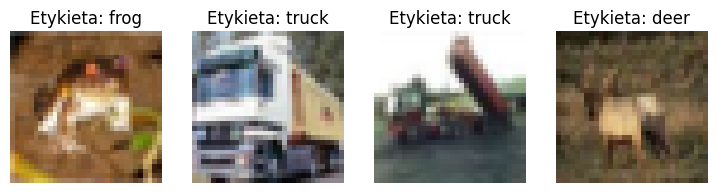

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 4, figsize=(9, 2))

# wyświetlmy 4 pierwsze obrazki ze zbioru treningowego
for i in range(4):
    ax[i].imshow(x_train[i])
    ax[i].set_title(f"Etykieta: {classes[y_train[i][0]]}")
    ax[i].axis('off')

In [4]:
from keras import models, layers

# architektura sieci
model = models.Sequential()
model.add(layers.Conv2D(
    6, (5, 5), activation='relu', kernel_initializer='he_normal',
    bias_initializer='zeros', input_shape=(32, 32, 3)
))

model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(
    16, (5, 5), activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'
))

model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Flatten())
model.add(
    layers.Dense(120, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
)

model.add(
    layers.Dense(84, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
)

model.add(layers.Dense(10, activation='softmax', bias_initializer='zeros'))

# wyświetlmy architekturę sieci
model.summary()

c:\Users\micha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.utils import to_categorical

# przygotowanie danych
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
# przygotowanie modelu do treningu
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
from sklearn.model_selection import train_test_split

# wydzielenie zbioru walidacyjnego ze zbioru treningowego
x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size=0.1,
    random_state=42
)

In [8]:
# trening modelu
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3984 - loss: 1.6683 - val_accuracy: 0.4638 - val_loss: 1.5015
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4955 - loss: 1.4082 - val_accuracy: 0.5052 - val_loss: 1.3827
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5324 - loss: 1.3065 - val_accuracy: 0.5218 - val_loss: 1.3129
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5614 - loss: 1.2365 - val_accuracy: 0.5418 - val_loss: 1.2816
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5772 - loss: 1.1868 - val_accuracy: 0.5368 - val_loss: 1.3205
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5967 - loss: 1.1347 - val_accuracy: 0.5638 - val_loss: 1.2363
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6098 - loss: 1.0966 - val_accuracy: 0.5670 - val_loss: 1.2319
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6276 - loss: 1.0539 - val_accuracy: 0.

In [9]:
# klasyfikacja na zbiorze testowym
print("Wyniki dla zbioru testowego")
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=64)

Wyniki dla zbioru testowego
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5999 - loss: 1.2561


In [10]:
# korzystam z sugerowanej biblioteki Optuna
import optuna
from optuna.integration import TFKerasPruningCallback

# zakresy wartości dla hiperparametrów
learning_rates = (1e-5, 1e-2)
dropout_rates = (0.2, 0.5)
filters_1 = (4, 12)
filters_2 = (12, 24)

# ustalone wartości do wyboru
max_epochs = [15, 20, 30]
batch_sizes = [32, 64, 128]

c:\Users\micha\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# funkcja tworzy sieć i zwraca 'accuracy' wytrenowanej sieci na zbiorze testowym
def objective(trial):
    # wybór hiperparametrów
    fil_1 = trial.suggest_int('filters_1', filters_1[0], filters_1[1])
    fil_2 = trial.suggest_int('filters_2', filters_2[0], filters_2[1])
    dropout_rate = trial.suggest_float('dropout_rate', dropout_rates[0], dropout_rates[1])
    learning_rate = trial.suggest_float(
        'learning_rate', learning_rates[0], learning_rates[1], log=True
    )

    batch_size = trial.suggest_categorical('batch_size', batch_sizes)
    epochs = trial.suggest_categorical('epochs', max_epochs)

    # budowa modelu z wybranymi parametrami
    model = models.Sequential()
    model.add(layers.Conv2D(
        fil_1, (5, 5), activation='relu', kernel_initializer='he_normal', 
        bias_initializer='zeros', input_shape=(32, 32, 3)
    ))

    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(
        fil_2, (5, 5), activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'
    ))

    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(
        layers.Dense(120, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
    )

    model.add(layers.Dropout(dropout_rate)) # dodana warstwa dropout'u
    model.add(
        layers.Dense(84, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
    )
    
    model.add(layers.Dropout(dropout_rate)) # dodana warstwa dropout'u
    model.add(layers.Dense(10, activation='softmax', bias_initializer='zeros'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # callback: pruner, żeby szybciej przerywać słabe próby
    prune_callback = TFKerasPruningCallback(trial, 'val_accuracy')

    model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, 
        validation_data=(x_val, y_val), callbacks=[prune_callback], verbose=0
    )
    
    _, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    
    return test_acc

In [12]:
# przeszukiwanie przestrzeni hiperparametrów
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2025-10-17 13:02:46,352] A new study created in memory with name: no-name-33987b73-e220-4f78-bb16-f5281b01772b
c:\Users\micha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5767 - loss: 1.2509


[I 2025-10-17 13:04:51,019] Trial 0 finished with value: 0.57669997215271 and parameters: {'filters_1': 4, 'filters_2': 14, 'dropout_rate': 0.2585351157374862, 'learning_rate': 0.004528381678860821, 'batch_size': 64, 'epochs': 30}. Best is trial 0 with value: 0.57669997215271.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5414 - loss: 1.2908


[I 2025-10-17 13:07:31,540] Trial 1 finished with value: 0.5414000153541565 and parameters: {'filters_1': 11, 'filters_2': 22, 'dropout_rate': 0.2310827190997945, 'learning_rate': 5.2500135952681386e-05, 'batch_size': 32, 'epochs': 20}. Best is trial 0 with value: 0.57669997215271.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6329 - loss: 1.0692


[I 2025-10-17 13:09:19,484] Trial 2 finished with value: 0.6328999996185303 and parameters: {'filters_1': 10, 'filters_2': 16, 'dropout_rate': 0.2537802146489891, 'learning_rate': 0.0011563166980414492, 'batch_size': 64, 'epochs': 20}. Best is trial 2 with value: 0.6328999996185303.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6218 - loss: 1.0780


[I 2025-10-17 13:13:08,991] Trial 3 finished with value: 0.6218000054359436 and parameters: {'filters_1': 7, 'filters_2': 23, 'dropout_rate': 0.3102194786036102, 'learning_rate': 0.00017437137446497822, 'batch_size': 32, 'epochs': 30}. Best is trial 2 with value: 0.6328999996185303.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5317 - loss: 1.3142


[I 2025-10-17 13:14:18,391] Trial 4 finished with value: 0.5317000150680542 and parameters: {'filters_1': 5, 'filters_2': 12, 'dropout_rate': 0.45796376693063706, 'learning_rate': 0.0004274047702909872, 'batch_size': 64, 'epochs': 15}. Best is trial 2 with value: 0.6328999996185303.
[I 2025-10-17 13:14:25,327] Trial 5 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:14:32,605] Trial 6 pruned. Trial was pruned at epoch 0.


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6412 - loss: 1.0630


[I 2025-10-17 13:16:50,983] Trial 7 finished with value: 0.6412000060081482 and parameters: {'filters_1': 11, 'filters_2': 24, 'dropout_rate': 0.4297389775217806, 'learning_rate': 0.002101782567212188, 'batch_size': 128, 'epochs': 30}. Best is trial 7 with value: 0.6412000060081482.
[I 2025-10-17 13:16:58,255] Trial 8 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:18:21,635] Trial 9 pruned. Trial was pruned at epoch 10.
[I 2025-10-17 13:18:28,449] Trial 10 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:18:39,110] Trial 11 pruned. Trial was pruned at epoch 1.
[I 2025-10-17 13:18:49,731] Trial 12 pruned. Trial was pruned at epoch 1.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6423 - loss: 1.0228


[I 2025-10-17 13:20:39,412] Trial 13 finished with value: 0.642300009727478 and parameters: {'filters_1': 10, 'filters_2': 19, 'dropout_rate': 0.42250216621182185, 'learning_rate': 0.0004832687775069522, 'batch_size': 64, 'epochs': 20}. Best is trial 13 with value: 0.642300009727478.
[I 2025-10-17 13:20:46,222] Trial 14 pruned. Trial was pruned at epoch 0.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6326 - loss: 1.0986


[I 2025-10-17 13:23:34,202] Trial 15 finished with value: 0.6326000094413757 and parameters: {'filters_1': 9, 'filters_2': 24, 'dropout_rate': 0.43182336910024316, 'learning_rate': 0.00269654122836704, 'batch_size': 64, 'epochs': 30}. Best is trial 13 with value: 0.642300009727478.
[I 2025-10-17 13:23:41,302] Trial 16 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:23:47,814] Trial 17 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:23:56,002] Trial 18 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:24:06,411] Trial 19 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:24:17,959] Trial 20 pruned. Trial was pruned at epoch 1.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6444 - loss: 1.0252


[I 2025-10-17 13:26:03,594] Trial 21 finished with value: 0.6444000005722046 and parameters: {'filters_1': 10, 'filters_2': 16, 'dropout_rate': 0.210630421343021, 'learning_rate': 0.001024374040594491, 'batch_size': 64, 'epochs': 20}. Best is trial 21 with value: 0.6444000005722046.
[I 2025-10-17 13:26:31,737] Trial 22 pruned. Trial was pruned at epoch 4.
[I 2025-10-17 13:26:39,683] Trial 23 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:26:52,233] Trial 24 pruned. Trial was pruned at epoch 1.


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6607 - loss: 0.9878


[I 2025-10-17 13:28:45,451] Trial 25 finished with value: 0.6607000231742859 and parameters: {'filters_1': 11, 'filters_2': 19, 'dropout_rate': 0.2745007787978405, 'learning_rate': 0.0007724485770162923, 'batch_size': 64, 'epochs': 20}. Best is trial 25 with value: 0.6607000231742859.
[I 2025-10-17 13:28:54,061] Trial 26 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:29:02,387] Trial 27 pruned. Trial was pruned at epoch 0.
[I 2025-10-17 13:29:19,602] Trial 28 pruned. Trial was pruned at epoch 2.
[I 2025-10-17 13:29:26,520] Trial 29 pruned. Trial was pruned at epoch 0.


In [13]:
# wybieram najlepsze parametry
params = study.best_trial.params
params

{'filters_1': 11,
 'filters_2': 19,
 'dropout_rate': 0.2745007787978405,
 'learning_rate': 0.0007724485770162923,
 'batch_size': 64,
 'epochs': 20}

In [14]:
# model z najlepszymi parametrami
best_model = models.Sequential()
best_model.add(layers.Conv2D(
    params['filters_1'], (5, 5), activation='relu', kernel_initializer='he_normal',
    bias_initializer='zeros', input_shape=(32, 32, 3)
))

best_model.add(layers.AveragePooling2D((2, 2)))
best_model.add(layers.Conv2D(
    params['filters_2'], (5, 5), activation='relu', kernel_initializer='he_normal', 
    bias_initializer='zeros'
))

best_model.add(layers.AveragePooling2D((2, 2)))
best_model.add(layers.Flatten())
best_model.add(
    layers.Dense(120, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
)

best_model.add(layers.Dropout(params['dropout_rate']))
best_model.add(
    layers.Dense(84, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros')
)

best_model.add(layers.Dropout(params['dropout_rate']))
best_model.add(layers.Dense(10, activation='softmax', bias_initializer='zeros'))

best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=params['learning_rate']),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

best_model.fit(
    x_train, 
    y_train, 
    epochs=params['epochs'], 
    batch_size=params['batch_size'], 
    validation_data=(x_val, y_val)
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3387 - loss: 1.7983 - val_accuracy: 0.4646 - val_loss: 1.4764
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4601 - loss: 1.4927 - val_accuracy: 0.5000 - val_loss: 1.3800
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5029 - loss: 1.3885 - val_accuracy: 0.5148 - val_loss: 1.3238
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5302 - loss: 1.3115 - val_accuracy: 0.5540 - val_loss: 1.2381
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5532 - loss: 1.2588 - val_accuracy: 0.5578 - val_loss: 1.2185
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5715 - loss: 1.2066 - val_accuracy: 0.5852 - val_loss: 1.1660
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5870 - loss: 1.1684 - val_accuracy: 0.5872 - val_loss: 1.1283
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6022 - loss: 1.1334 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


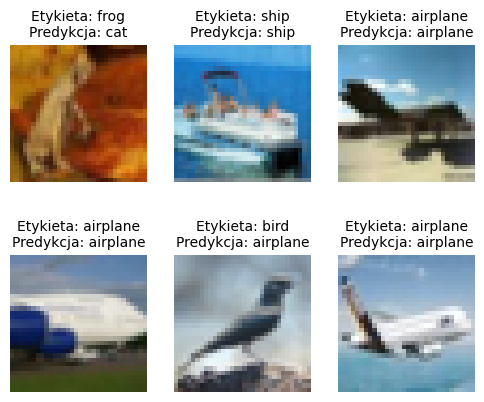

In [17]:
import numpy as np
from random import sample

# wybieram losowo 6 obrazków ze zbioru testowego
idxs = sample(range(y_test.shape[0]), 6)
images = x_test[idxs]
true_labels = [classes[arg[1]] for arg in np.argwhere(y_test[idxs])]

# predykcja sieci
predicted_labels = best_model.predict(images)
predicted_labels = [classes[pred.argmax()] for pred in predicted_labels]

_, ax = plt.subplots(2, 3, figsize=(6, 5))

# przedstawienie obrazków wraz z etykietami i predykcjami
for i, (image, true_label, predicted_label) in enumerate(zip(images, true_labels, predicted_labels)):
    ax[i//3][i%3].imshow(image)
    ax[i//3][i%3].set_title(f"Etykieta: {true_label}\nPredykcja: {predicted_label}", fontsize=10)
    ax[i//3][i%3].axis('off')